In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

torch.Size([100, 1, 28, 28]) torch.Size([100])


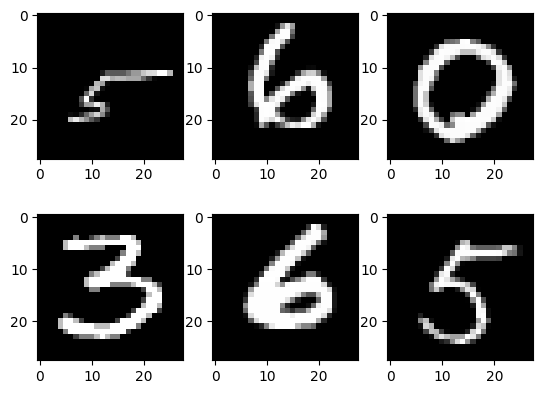

In [9]:
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.1307,),(0.3081,))
])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [10]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out
  
model = NeuralNet(input_size, hidden_size, num_classes)

In [11]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
# Training Loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader, 0):
    # origin shape: [100, 1, 28, 28]
    # resized: [100, 784]
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    
    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i+1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/5], Step [100/600], Loss: 0.3384
Epoch [1/5], Step [200/600], Loss: 0.4308
Epoch [1/5], Step [300/600], Loss: 0.2429
Epoch [1/5], Step [400/600], Loss: 0.1611
Epoch [1/5], Step [500/600], Loss: 0.4684
Epoch [1/5], Step [600/600], Loss: 0.1084
Epoch [2/5], Step [100/600], Loss: 0.2622
Epoch [2/5], Step [200/600], Loss: 0.1311
Epoch [2/5], Step [300/600], Loss: 0.0738
Epoch [2/5], Step [400/600], Loss: 0.1547
Epoch [2/5], Step [500/600], Loss: 0.2667
Epoch [2/5], Step [600/600], Loss: 0.1668
Epoch [3/5], Step [100/600], Loss: 0.0409
Epoch [3/5], Step [200/600], Loss: 0.0398
Epoch [3/5], Step [300/600], Loss: 0.1159
Epoch [3/5], Step [400/600], Loss: 0.1251
Epoch [3/5], Step [500/600], Loss: 0.0653
Epoch [3/5], Step [600/600], Loss: 0.1288
Epoch [4/5], Step [100/600], Loss: 0.0360
Epoch [4/5], Step [200/600], Loss: 0.1006
Epoch [4/5], Step [300/600], Loss: 0.1045
Epoch [4/5], Step [400/600], Loss: 0.0425
Epoch [4/5], Step [500/600], Loss: 0.1421
Epoch [4/5], Step [600/600], Loss:

In [13]:
# Test the model
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    
    outputs = model(images)
    # max returns (value ,index)
    _, predicted = torch.max(outputs.data, 1)
    n_samples += labels.shape[0]
    n_correct += (predicted == labels).sum().item()
    
  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.4 %


In [14]:
# Save the model
torch.save(model.state_dict(), "mnist_ffn.pth")